In [1]:
!pip install qiskit
!pip install qiskit-aer

In [2]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,Aer,execute
from qiskit.quantum_info import Statevector

In [3]:
from numpy import sqrt

u = Statevector([1 / sqrt(2),1/sqrt(2)])
v = Statevector([(1 + 2.0j) / 3 , -2/3])


In [4]:
u

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [5]:
display(u.draw('latex'))

<IPython.core.display.Latex object>

In [6]:
display(u.draw('text'))

[0.70710678+0.j,0.70710678+0.j]

In [7]:
# to see if the statevector is valid or not
display(v.is_valid())

True

<b> Simulating Measurement using Statevector </b>

In [8]:
display(v.draw('latex'))

<IPython.core.display.Latex object>

In [9]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

running the measure method simulates a standard basis measurement. It returns the result of that measurement, plus the new quantum state of our system after that measurement.

Statevector will throw an error if the measure method is applied to an invalid quantum state vector.

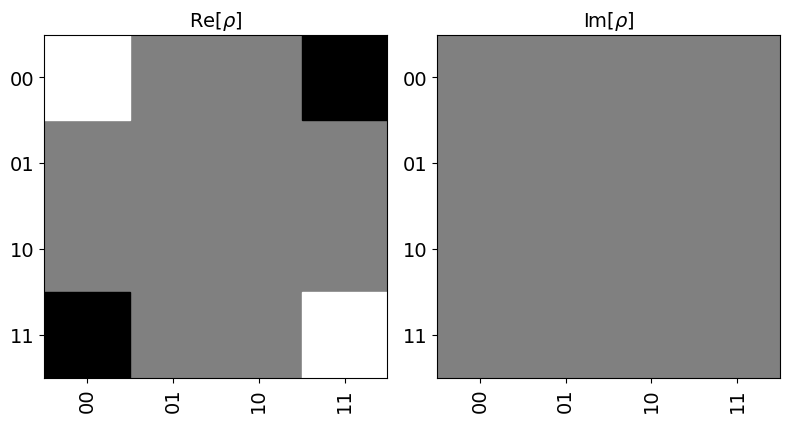

In [10]:
sv = Statevector([1/sqrt(2),0,0,-1/sqrt(2)])
sv.draw('hinton')

<b> Measurement Probability Vector </b>

In [11]:
psi = Statevector.from_label('+0') # same as |+> tensor |0>

# probabilities for measuring both qubits
probs = psi.probabilities()
print(f'probs: {probs}')

#probabilities for measuring only qubit - 0
probs_qubit_0 = psi.probabilities([0])
print(f'Qubit-0 probs : {probs_qubit_0}')

# Probabilities for measuring only qubit - 1
probs_qubit_1 = psi.probabilities([1])
print(f'Qubit-1 probs: {probs_qubit_1}')

probs: [0.5 0.  0.5 0. ]
Qubit-0 probs : [1. 0.]
Qubit-1 probs: [0.5 0.5]


We can also permute the order of qubits in the qargs list to change the qubit position in the probabilities output

In [12]:
probs = psi.probabilities([0,1])
print(f'probs: {probs}')

# probabilities for measuring both qubits but swapping qubit 0 and 1 in output

probs_swapped = psi.probabilities([1,0])
print(f'Swapped probs: {probs_swapped}')

probs: [0.5 0.  0.5 0. ]
Swapped probs: [0.5 0.5 0.  0. ]


<b>to_dict(decimals=None)</b>

In [13]:
psi = Statevector.from_label('-0')
print(psi.to_dict())

{'00': (0.7071067811865475+0j), '10': (-0.7071067811865475+0j)}


For non-qubit subsystem the integer range can go from 0 to 9

In [14]:
import numpy as np

vec = np.zeros(9)
vec[0] = 1 / np.sqrt(2)
vec[-1] = 1 / np.sqrt(2)
psi = Statevector(vec , dims=(3,3))
print(psi.to_dict())

{'00': (0.7071067811865475+0j), '22': (0.7071067811865475+0j)}


For large subsystem dimensions delimiters are required. The following example is for a 20-dimensional system consisting of a qubit and 10-dimensional qudit.

In [15]:
vec = np.zeros(2*10)
vec[0] = 1 / np.sqrt(2)
vec[-1] = 1 / np.sqrt(2)
psi = Statevector(vec,dims=(2,10))
print(psi.to_dict())

{'00': (0.7071067811865475+0j), '91': (0.7071067811865475+0j)}


Statevector also comes with a sample_counts method that allows for the simulation of any number off measurement on the system.

{'0': (0.3333333333333333+0.6666666666666666j), '1': (-0.6666666666666666+0j)}

{'0': 532, '1': 468}

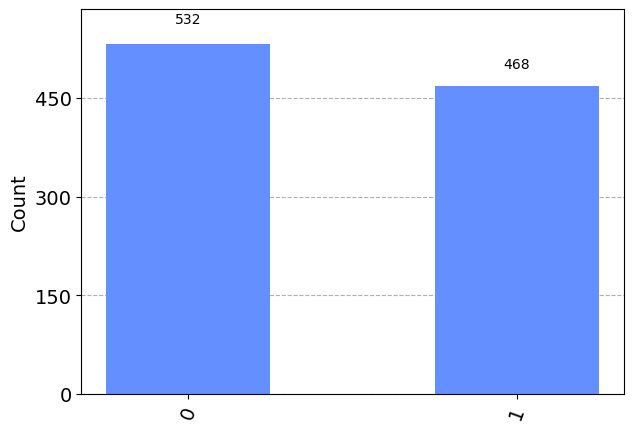

In [16]:
from qiskit.visualization import plot_histogram

stats = v.sample_counts(1000)
display(v.to_dict())
display(stats)
plot_histogram(stats)

<b> Performing operations with Operator and Statevector </b>

Unitary operations can be defined and performed on state vectors in Qiskit using the Operator class, as in the example that follows.

In [17]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

<b> Quantum Circuit </b>

C:\Users\LENOVO\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


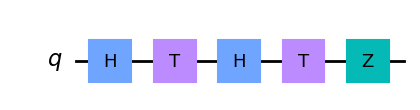

In [18]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

display(circuit.draw(output='mpl'))

Let us first initialize a starting quantum state vector and then evolve that state according to the sequence of operations.

In [19]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw('latex')

<IPython.core.display.Latex object>

Finally, let's simulate the result of running this experiment (i.e., preparing the state 
∣
0
⟩
,
∣0⟩, applying the sequence of operations represented by the circuit, and measuring) 4000 times.

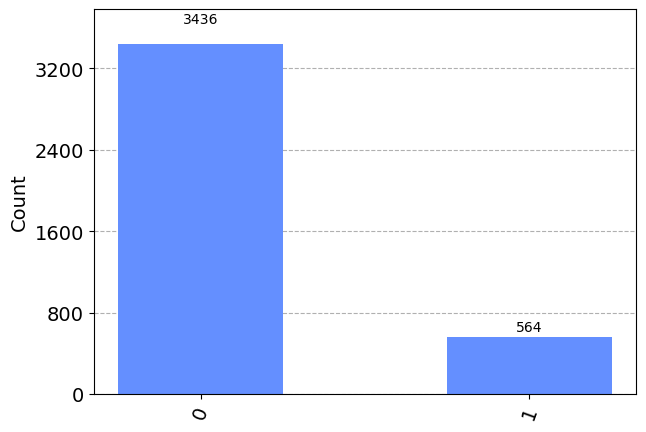

In [20]:
stats = v.sample_counts(4000)
plot_histogram(stats)

<b> Tensor Products </b>

In [21]:
# |0> tensor |1>
zero,one = Statevector.from_label('0'),Statevector.from_label('1')
zero.tensor(one).draw('latex')

<IPython.core.display.Latex object>

In [22]:
plus = Statevector.from_label('+')
i_state = Statevector([1/sqrt(2),1j / sqrt(2)])
psi = plus.tensor(i_state)
psi.draw('latex')

<IPython.core.display.Latex object>

In [23]:
# operator class also has a tensor method

X = Operator([[0,1], [1,0]])
I = Operator([[1,0], [0,1]])
X.tensor(I)

Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


^ operator tensors matrices together

In [24]:
psi.evolve(I ^ X).draw('latex')

<IPython.core.display.Latex object>

In [25]:
# creating CX operator and calculate CX|psi>

CX = Operator(
[
    [1,0,0,0],
    [0,1,0,0],
    [0,0,0,1],
    [0,0,1,0]
])

psi.evolve(CX).draw('latex')

<IPython.core.display.Latex object>

<b> Partial Measurements </b>

In [26]:
W = Statevector([0,1,1,0,1,0,0,0]/sqrt(3))
W.draw('latex')

<IPython.core.display.Latex object>

The cell below simulates a measurement on the rightmost qubit (which has index 0). The other two qubits are not measured.

In [27]:
result , new_sv = W.measure([0])
print(f'Measured: {result} \nState after measurement: ')
new_sv.draw('latex')
    

Measured: 0 
State after measurement: 


<IPython.core.display.Latex object>